## Data Science Course
### Final project
#### Author: Pawel Jelonek

### Summary: Project take initial data: race, age and skin color and based on that analize NYPD data and then compute which district is safest for, then creates a map to show this district(black - safe, white -dangerous).
### Then project takes data from last 15 years and with Regression we compute data to choose which district might be the best for us in the future.


This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2017):
	https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
%matplotlib inline

## Firstly we will compute which district might be the safest for us based od only 2019 NYPD data.

### Load NYPD dataset for 2019

In [2]:
wiki = pd.read_csv("C:/Users/Paweł/OneDrive/Python/DataScience/projekt/NYPD_2019.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Create dictionary based on sex to easily get specific data from database

In [3]:
dict_sex_map = {'Male': 'M',
            'Female': 'F'}
 
def map_prct_for_sex(sex, db):
    return get_prct_for_sex(dict_sex_map.get(sex), db)
    
def get_prct_for_sex(sex, wiki_database):
# Take label with victim's sex from dataframe
    wiki_vic_sex = wiki_database["VIC_SEX"]
    wiki_vic_sex.dropna()

# Create table with counted categories
    sex_counts_table = wiki_vic_sex.value_counts()

# Define general variables with percentage
    general_number_of_sex = len(wiki_vic_sex)

    female_sex_victs = sex_counts_table['F']
    male_sex_victs = sex_counts_table['M']

    female_sex_victs_prct = int((female_sex_victs/general_number_of_sex)*100)
    male_sex_victs_prct = int((male_sex_victs/general_number_of_sex)*100)

# Create dictonary for sex
    dict_sex = {'M': male_sex_victs_prct,
                'F': female_sex_victs_prct}

    return dict_sex.get(sex)

### Create same dictionary for age variable

In [4]:
# Mapper so we can pass int to get values
def map_prct_for_age(your_age, wiki_database):
    if your_age < 18:
        your_age_mapped = '<18'
    elif your_age < 25:
        your_age_mapped = '18-24'
    elif your_age < 45:
        your_age_mapped = '25-44'
    elif your_age < 65:
        your_age_mapped = '45-64'
    else:
        your_age_mapped = '65+'
    return get_prct_for_age(your_age_mapped, wiki_database)

def get_prct_for_age(your_age, wiki_database):
# Take label with victim's age from dataframe
    wiki_vic_age = wiki_database["VIC_AGE_GROUP"]
    wiki_vic_age.dropna()

# Create table with counted categories
    age_counts_table = wiki_vic_age.value_counts()

# Define general variables with percentage
    general_number_of_age = len(wiki_vic_age)

    age_under_18_victs = age_counts_table["<18"]
    age_18_24_victs = age_counts_table["18-24"]
    age_25_44_victs = age_counts_table["25-44"]
    age_45_64_victs = age_counts_table["45-64"]
    age_above_65_victs = age_counts_table["65+"]

    age_under_18_victs_prct = int((age_under_18_victs / general_number_of_age)*100)
    age_18_24_victs_prct = int((age_18_24_victs / general_number_of_age)*100)
    age_25_44_victs_prct = int((age_25_44_victs / general_number_of_age)*100)
    age_45_64_victs_prct = int((age_45_64_victs / general_number_of_age)*100)
    age_above_65_victs_prct = int((age_above_65_victs / general_number_of_age)*100)

# Create dictonary for age
    dict_age = {'<18': age_under_18_victs_prct,
                '18-24': age_18_24_victs_prct,
                '25-44': age_25_44_victs_prct,
                '45-64': age_45_64_victs_prct,
                '65+': age_above_65_victs_prct}

    return dict_age.get(your_age)

### As below we will create dictionary for our race

In [5]:
# Create mapper for race
dict_race_map = {'BLACK': 'BLACK',
            'WHITE HISPANIC': 'WHITE HISPANIC',
            'ASIAN': 'ASIAN / PACIFIC ISLANDER',
            'WHITE': 'WHITE',
            'BLACK HISPANIC': 'BLACK HISPANIC',
            'INDIAN': 'AMERICAN INDIAN/ALASKAN NATIVE'}

# Making mapper to make it more easy to use
def map_prct_for_race(your_race, wiki_database):
    return get_prct_for_race(dict_race_map.get(your_race), wiki_database)

def get_prct_for_race(your_race, wiki_database):
# Take label with victim's race from dataframe
    wiki_vic_race = wiki_database["VIC_RACE"]
    wiki_vic_race.dropna()

# Create table with counted categories
    race_counts_table = wiki_vic_race.value_counts()

# Define general variables with percentage
    general_number_of_race = len(wiki_vic_race)

    race_BLACK_victs = race_counts_table["BLACK"]
    race_WHITE_HISPANIC_victs = race_counts_table["WHITE HISPANIC"]
    race_WHITE_victs = race_counts_table["WHITE"]
    race_ASIAN_victs = race_counts_table["ASIAN / PACIFIC ISLANDER"]
    race_BLACK_HISPANIC_victs = race_counts_table["BLACK HISPANIC"]
    race_INDIAN_victs = race_counts_table["AMERICAN INDIAN/ALASKAN NATIVE"]

    race_BLACK_victs_prct = int((race_BLACK_victs / general_number_of_race)*100)
    race_WHITE_HISPANIC_victs_prct = int((race_WHITE_HISPANIC_victs / general_number_of_race)*100)
    race_WHITE_victs_prct = int((race_WHITE_victs / general_number_of_race)*100)
    race_ASIAN_victs_prct = int((race_ASIAN_victs / general_number_of_race)*100)
    race_BLACK_HISPANIC_victs_prct = int((race_BLACK_HISPANIC_victs / general_number_of_race)*100)
    race_INDIAN_victs_prct = int((race_INDIAN_victs / general_number_of_race)*100)

# Create dictonary for race
    dict_race = {'BLACK': race_BLACK_victs_prct,
                'WHITE HISPANIC': race_WHITE_HISPANIC_victs_prct,
                'ASIAN / PACIFIC ISLANDER': race_ASIAN_victs_prct,
                'WHITE': race_WHITE_victs_prct,
                'BLACK HISPANIC': race_BLACK_HISPANIC_victs_prct,
                'AMERICAN INDIAN/ALASKAN NATIVE': race_INDIAN_victs_prct}

    return dict_race.get(your_race)

### We map our results to create result which is our percentage to be a victim as:
### <center> $\Large\frac{age + race  + sex}{3} = result$ </center>

In [6]:
def map_result(state, age, race, sex):
    age_result = map_prct_for_age(age, wiki.loc[(wiki.BORO_NM == state)])
    race_result = map_prct_for_race(race, wiki.loc[(wiki.BORO_NM == state)])
    sex_result = map_prct_for_sex(sex, wiki.loc[(wiki.BORO_NM == state)])

    final_result = int((age_result + race_result + sex_result)/3.0)
    return str(final_result)

def map_result_with_wiki(state, age, race, sex, wiki):
    age_result = map_prct_for_age(age, wiki.loc[(wiki.BORO_NM == state)])
    race_result = map_prct_for_race(race, wiki.loc[(wiki.BORO_NM == state)])
    sex_result = map_prct_for_sex(sex, wiki.loc[(wiki.BORO_NM == state)])

    final_result = (age_result + race_result + sex_result)/3.0
    return str(final_result)

### To see which district is safest for us pass below your age, race and sex and based on 2019 NYPD data you will see results.

In [7]:
# MAIN STARTER
your_age = 36
your_race = "BLACK"
your_sex = "Female"
states_name_array = ['BROOKLYN','MANHATTAN','BRONX','QUEENS','STATEN ISLAND']
result_database = pd.DataFrame(columns=('STATE', '% TO BE A VICTIM'))
for state in states_name_array:
    result_database = result_database.append({'STATE': state,'% TO BE A VICTIM': map_result(state, your_age, your_race, your_sex)}, ignore_index = True)

result_database.sort_values(by=['% TO BE A VICTIM'], inplace=True)
result_database

,STATE,% TO BE A VICTIM
1,MANHATTAN,27
4,STATEN ISLAND,31
3,QUEENS,33
2,BRONX,35
0,BROOKLYN,36


### Plotting New York City map for reference

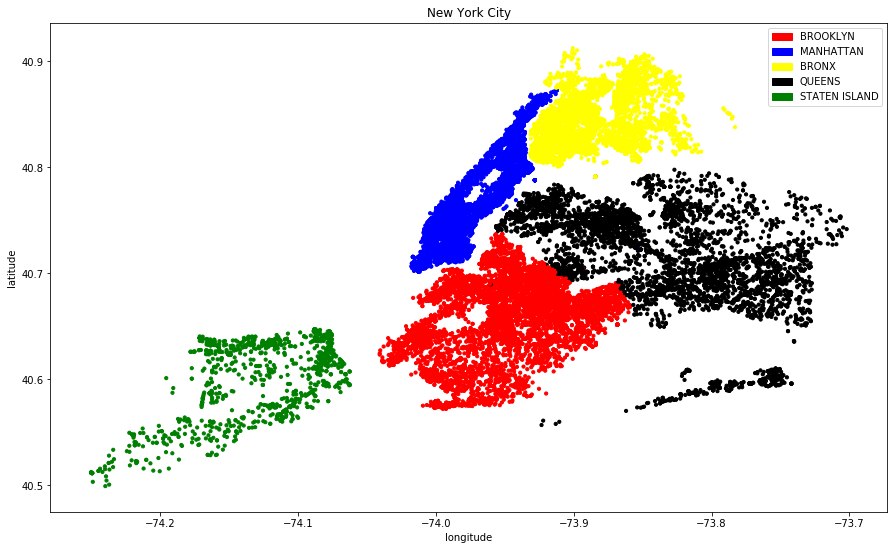

In [13]:

# Create datafeame with coords
wiki_map_test = wiki[{'Longitude','Latitude','BORO_NM'}]
wiki_map_test = wiki_map_test.dropna()

# Create dictonary for neighbrhoods
dict_names_map_color = {'BROOKLYN':'RED',
        'MANHATTAN':'BLUE',
        'BRONX': 'YELLOW',
        'QUEENS':'BLACK',
        'STATEN ISLAND':'GREEN'}

# Add color to table based on our dictonary
wiki_map_test['COLOR'] = wiki_map_test['BORO_NM'].map(dict_names_map_color)

# Plot our NY city map
x = wiki_map_test['Longitude']
y = wiki_map_test['Latitude']
plt.scatter(x,y,c=wiki_map_test['COLOR'],s = 10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("New York City")
plt.rcParams['figure.figsize'] = 15, 9
BROOKLYN = mpatches.Patch(color='red', label='BROOKLYN')
MANHATTAN = mpatches.Patch(color='blue', label='MANHATTAN')
BRONX = mpatches.Patch(color='yellow', label='BRONX')
QUEENS = mpatches.Patch(color='black', label='QUEENS')
STATEN_ISLAND = mpatches.Patch(color='green', label='STATEN ISLAND')

plt.legend(handles=[BROOKLYN, MANHATTAN,BRONX,QUEENS,STATEN_ISLAND])

plt.show()

### New York City where color describe which district is safest for us (black - safe, white - dangerous)

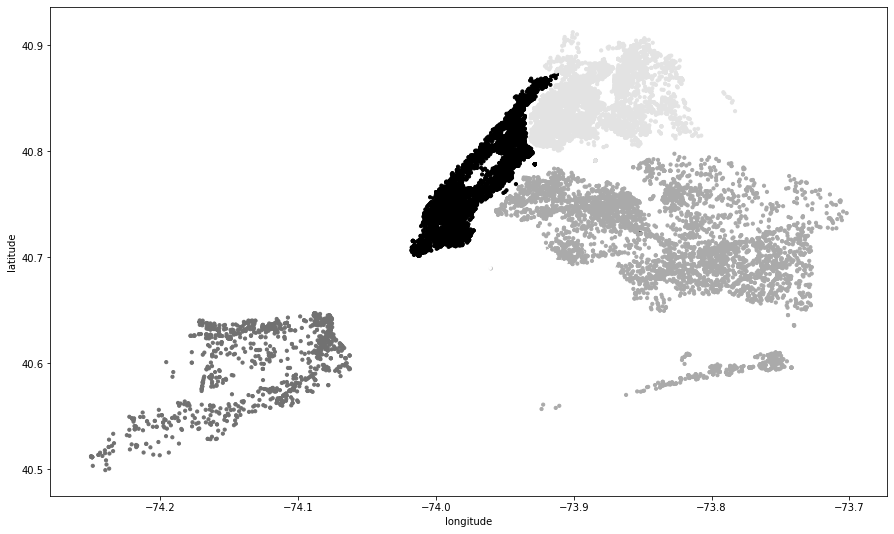

In [14]:
# Create datafeame with coords
wiki_map_test = wiki[{'Longitude','Latitude','BORO_NM'}]
wiki_map_test = wiki_map_test.dropna()

value_brooklyn = float(result_database['% TO BE A VICTIM'].loc[result_database['STATE'] == 'BROOKLYN'].values[0])/50.0
value_manhattan = float(result_database['% TO BE A VICTIM'].loc [result_database['STATE'] == 'MANHATTAN'].values[0])/50.0
value_bronx = float(result_database['% TO BE A VICTIM'].loc[result_database['STATE'] == 'BRONX'].values[0])/50.0
value_queens = float(result_database['% TO BE A VICTIM'].loc[result_database['STATE'] == 'QUEENS'].values[0])/50.0
value_stated = float(result_database['% TO BE A VICTIM'].loc[result_database['STATE'] == 'STATEN ISLAND'].values[0])/50.0

# Create dictonary for neighbrhoods
dict_names_map = {'BROOKLYN': value_brooklyn,
        'MANHATTAN': value_manhattan,
        'BRONX': value_bronx,
        'QUEENS': value_queens,
        'STATEN ISLAND': value_stated}

# Add color to table based on our dictonary
wiki_map_test['COLOR'] = wiki_map_test['BORO_NM'].map(dict_names_map)


# Plot our NY city map
x = wiki_map_test['Longitude']
y = wiki_map_test['Latitude']
plt.scatter(x,y,c=wiki_map_test['COLOR'],s = 10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.gray()
plt.show()

### Now we are gonna compute results based on NYPD data for the last 13 years.

### Load NYPD database for the last 13 years

In [15]:
wiki_all = pd.read_csv("C:/Users/Paweł/OneDrive/Python/DataScience/projekt/NYPD.csv")
wiki_all['CMPLNT_FR_DT'] = wiki_all['CMPLNT_FR_DT'].dropna()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Put values from selected years to a dictionary

In [16]:
wiki_for_year = {}
for i in np.linspace(2006, 2018, 13):
    wiki_for_year[str(int(i))] = wiki_all[wiki_all.CMPLNT_FR_DT.str.contains(str(int(i)),na=False)]

### Put below your age, race and sex to see results from previous years as well as regression model for future years.

In [17]:
# MAIN STARTER FOR DIFF YEARS
your_age = 36
your_race = "BLACK"
your_sex = "Female"
states_name_array = ['BROOKLYN','MANHATTAN','BRONX','QUEENS','STATEN ISLAND']
result_database_test = pd.DataFrame(columns=('STATE', '2006'))
for state in states_name_array:
    result_database_test = result_database_test.append({'STATE': state,'2006': map_result_with_wiki(state, your_age, your_race, your_sex, wiki_for_year['2006'])}, ignore_index = True)

### Compute results for specific years including your results.

In [18]:
for i in np.linspace(2007, 2018, 12):
    array_test = []
    for state in states_name_array:
        array_test.append(map_result_with_wiki(state, your_age, your_race, your_sex, wiki_for_year[str(int(i))]))
    result_database_test[str(int(i))] = array_test

### Get from results data for all districts

In [19]:
data_brooklyn_historic = result_database_test.iloc[0][1:14]
data_manhattan_historic = result_database_test.iloc[1][1:14]
data_bronx_historic = result_database_test.iloc[2][1:14]
data_queens_historic = result_database_test.iloc[3][1:14]
data_staten_historic = result_database_test.iloc[4][1:14]

### Create array for future years you want to see

In [20]:
future_years = np.array([2019,2020,2021,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]).reshape(-1,1)

### Create dictionary for all New York City districts

In [21]:
dict_predictions = {
    'BROOKLYN' : data_brooklyn_historic,
    'MANHATTAN' : data_manhattan_historic,
    'BRONX' : data_bronx_historic,
    'QUEENS' : data_queens_historic,
    'STATEN ISLAND' : data_staten_historic
}

### Initialize regression model based on historic database

In [22]:
def print_state_with_color(state_data, color):
    model = LinearRegression()
    X = state_data.index.values.reshape(-1,1).astype(np.float)
    y = state_data.values.reshape(-1, 1).astype(np.float)
    model.fit(X=X,y=y)
    y_pred = model.predict(future_years)
    plt.plot(X,y,c=color)
    plt.plot(future_years,y_pred,c=color)

### See graph with historic data and computed future data

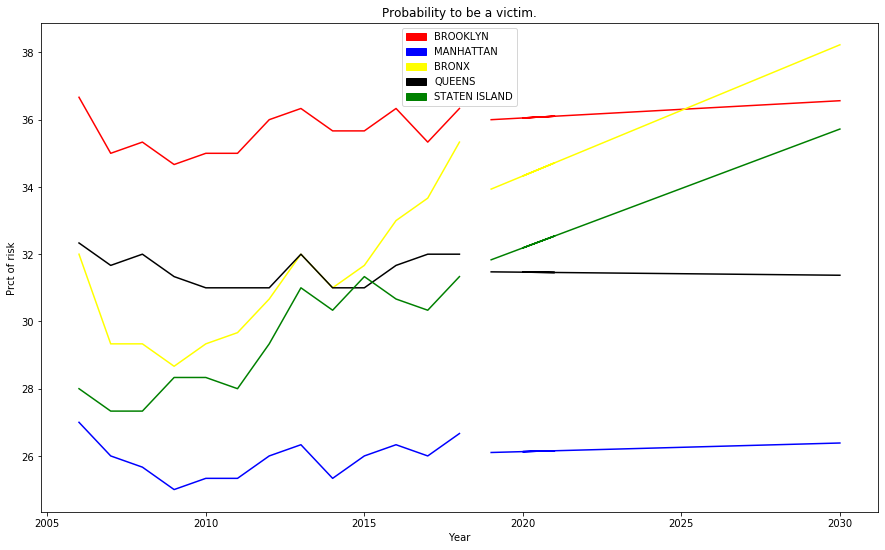

In [23]:
for key, value in dict_predictions.items():
    print_state_with_color(value, dict_names_map_color.get(key))
plt.xlabel("Year")
plt.ylabel("Prct of risk")
plt.title("Probability to be a victim.")
BROOKLYN = mpatches.Patch(color='red', label='BROOKLYN')
MANHATTAN = mpatches.Patch(color='blue', label='MANHATTAN')
BRONX = mpatches.Patch(color='yellow', label='BRONX')
QUEENS = mpatches.Patch(color='black', label='QUEENS')
STATEN_ISLAND = mpatches.Patch(color='green', label='STATEN ISLAND')

plt.legend(handles=[BROOKLYN, MANHATTAN,BRONX,QUEENS,STATEN_ISLAND])

plt.show()
